So far, all the PDE examples we have looked at have been linear. What do we do if we run into a non-linear system? The are gnarly problems, and some of them don't even have solutions. We are going to examine one approach called *perturbation* that provide approximate solutions by using a small parameter.

Perturbation methods can be used when:

1. One of the parameters has only very small or very large values.

2. The equation can be solved analytically when $\epsilon = 0$.

These conditions are often met just due to the physical phenomena involved.

We introduce a new form of series solution known as an *asymtoptic expansion* of the form:

$$y(x, \epsilon) = \sum_{n=0}^{\infty}{y_n(x) u_n(\epsilon)} \text{  as  } \epsilon \rightarrow 0 $$

where $u_n$ is an asymtoptic function:

$$u_n(\epsilon) = o [u_{n-1}(\epsilon] $$

This implies that:

$$\lim_{\epsilon \rightarrow 0} \frac{u_n(\epsilon)}{u_{n-1}(\epsilon)} = 0$$

Example functions that fit this criteria are:

$$\epsilon^n, n \epsilon^n, \ln [1+\epsilon]^n $$

Note that while the solution has only local validity with respect to $\epsilon$, it has global validity with respect to x.

The general procedure for evaluating the coefficients is:

$$y_0(x) = \lim_{\epsilon \rightarrow 0}{\frac{y(x,\epsilon)}{u_0(\epsilon)}}$$

$$y_1(x) = \lim_{\epsilon \rightarrow 0}{\frac{y(x,\epsilon) - y_0(x) u_0(\epsilon)}{u_1(\epsilon)}}$$

$$y_N(x) = \lim_{\epsilon \rightarrow 0}{\frac{y(x,\epsilon) - \sum_{n=0}^{N-1}y_n(x) u_n(\epsilon)}{u_N(\epsilon)}}$$

In the common case that $u_n(\epsilon) = \epsilon^n$, this becomes a Taylor series expansion:

$$y(x, \epsilon) = \sum_{n=0}^{\infty}{\frac{\epsilon^n}{n!} \bigg( \frac{\partial^n y}{\partial \epsilon^n} \bigg)} $$

## Regular perturbation method example

We will demonstrate the regular perturbation method with the algebraic equation:

$$y^2 + y + \epsilon  = 0 $$

We will select $u_n(\epsilon) = \epsilon^n$. The solution becomes:

$$y(\epsilon) = \sum_{n=0}^{\infty}{\epsilon^n y_n} $$

But the coefficients still must be selected. We will do so by substituting the proposed solution into the original equation:

$$(y_0 + \epsilon y_1 + \epsilon^2 y_2 + ...)^2 + (y_0 + \epsilon y_1 + \epsilon^2 y_2 + ...) + \epsilon = 0 $$

Expanding for small \epsilon becomes:

$$y_0^2 + 2y_0 y_1 \epsilon + (y_1^2 + 2 y_0 y_2)\epsilon^2+ ... +  y_0 + \epsilon y_1 + \epsilon^2 y_2 + ... = 0$$

Grouping gives:

$$(y_0^2 + y_0) + (2 y_0 y_1 + y_1 + 1)\epsilon + (y_1^2 + 2 y_0 y_2 + y_2)\epsilon^2 + ... = 0 $$

Since this equation must be satisfied for all values of $\epsilon$, and the coefficients of $y_N$ do not depend on $\epsilon$, each of the terms multiplying powers of $\epsilon$ must be equal to zero. Thus:

$$y_0(y_0 + 1) = 0 $$
$$2y_0 y_1 + y_1 +1 = 0 $$
$$y_1^2+ 2 y_0 y_2 + y_2 = 0 $$

Since the first equation leads to two possible solutions, there are two distinct sets of coefficients:

$$y(\epsilon) = -\epsilon - \epsilon^2 + ... $$
$$y(\epsilon) = -1 + \epsilon + \epsilon^2 + ... $$

We know the exact solution is given by:

$$y_{\pm} = \frac{-1 \pm \sqrt{1 - 4\epsilon}}{2} $$

Performing a Taylor series expansion around this yields the perturbation solution found above.

Now let's try finding a perturbation solution to an ODE:

$$\frac{d^2 y}{dx^2} = \epsilon y, x \in (0,1) $$

with BCs

$$\frac{dy}{dx}_{0} = 0, y(1) = 1 $$

which represents the concentration profile in a flat slab of catalyst where an isothermal first-order reaction occurs. The Thiele modulus $\sqrt{\epsilon} $ is a small parameter when the internal rate of diffusive mass transport is much faster than the rate of chemical reaction.

We can find the exact solution using methods from earlier in the course as:

$$y(x) = \frac{\cosh {\sqrt{\epsilon} x}}{\cosh {\sqrt{\epsilon}}} $$

Now let us solve with perturbation methods, assuming a solution of the form:

$$y(x, \epsilon) = \sum_{n=0}^{\infty}{\epsilon^n y_n(x)} $$

After substitution, we make the same assumption that terms of equal orders of magnitude must be equation to zero:

$$O(\epsilon^0): \frac{d^2 y_0}{d x^2} = 0, x \in (0,1) $$

and BCs $\frac{d y_0}{dx}_{x=0} = 0, y_0(1) = 1 $

$$O(\epsilon^1): \frac{d^2 y_1}{d x^2} = y_0, x \in (0,1) $$

and BCs $\frac{d y_1}{dx}_{x=0} = 0, y_1(1) = 0 $

$$O(\epsilon^2): \frac{d^2 y_2}{d x^2} = y_1, x \in (0,1) $$

and BCs $\frac{d y_2}{dx}_{x=0} = 0, y_2(1) = 0 $

Solving each of the above problems yields:

$$y_0(x) = 1 $$
$$y_1(x) = -\frac{1}{2}(1 - x^2) $$
$$y_2(x) = \frac{1}{4} \bigg( \frac{5}{6} - x^2 + \frac{x^4}{6} \bigg) $$

Substituting, this becomes:

$$y(x, \epsilon) = 1 - \frac{\epsilon}{2}(1 - x^2) + \frac{\epsilon^2}{4} \bigg( \frac{5}{6} - x^2 + \frac{x^4}{6} \bigg) + O(\epsilon^3)$$

It is left as an exercise to verify that the Taylor series expansion of the exact solution reproduces this result.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

(0.0, 1.01)

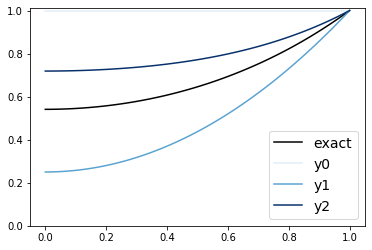

In [21]:
x = np.linspace(0, 1, 101)
eps = 1.5

y = np.cosh(np.sqrt(eps)*x)/np.cosh(np.sqrt(eps))
y0 = x*0 + 1
y1 = 1 - eps*(1-x**2)/2
y2 = y1 + eps**2*(5/6 - x**2 + x**4/6)/4

colors = cm.Blues(np.linspace(0.1, 1, 3))

fig, ax = plt.subplots()

ax.plot(x, y, c='k', label='exact')
ax.plot(x, y0, c=colors[0], label='y0')
ax.plot(x, y1, c=colors[1], label='y1')
ax.plot(x, y2, c=colors[2], label='y2')

ax.legend(fontsize=14)
ax.set_ylim([0.0, 1.01])

# When regular perturbation methods fail

## Secular-Type Problems

Regular perturbation fails when the independent variable (x or t) belongs to an infinite domain. 

In this case, you can find a solution. But for any given $\epsilon$ and any number of terms, there exists a sufficiently large t beyond with the solution breaks down. This is due to the presence of terms in the solution (e.g. $t^n$) which grow unbounded with t. No matter how small $\epsilon is$, these terms will go to infinity. 

These are called *secular* terms, and these are referred to as *secular-type problems*. They require special techniques to rescale the independent variable.

Example: second-order reaction in a batch reactor.

(0.0, 5.01)

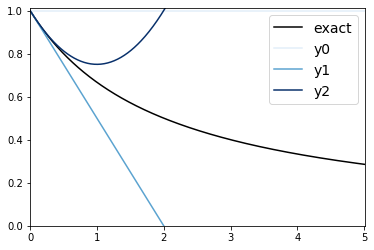

In [27]:
t = np.linspace(0, 10, 1001)
eps = 0.5

y = 1/(1+eps*t)
y0 = 0*t + 1
y1 = 1-eps*t
y2 = y1 + eps**2*t**2

colors = cm.Blues(np.linspace(0.1, 1, 3))

fig, ax = plt.subplots()

ax.plot(t, y, c='k', label='exact')
ax.plot(t, y0, c=colors[0], label='y0')
ax.plot(t, y1, c=colors[1], label='y1')
ax.plot(t, y2, c=colors[2], label='y2')

ax.legend(fontsize=14)
ax.set_ylim([0.0, 1.01])
ax.set_xlim([0.0, 5.01])

## Boundary Layer-Type Problems

The second class of failure is when the order or dimensionality or type of the original equation changes when the small parameter vanishes e.g. the small parameter multiplies a higher-order derivative:

$$\epsilon \frac{d^2 y}{x^2} = y $$

or

$$\epsilon \frac{\partial y}{\partial t} + \alpha \frac{\partial y}{\partial x} + \frac{\partial ^2 y}{\partial x^2} = 1 $$

In both cases, the zeroth order solution y_0 is incompatible with one of the associated conditions. If we solve the first solution using exact methods, we get:

$$y = \frac{\cosh(x/\sqrt{\epsilon})}{\cosh{1/\sqrt{\epsilon}}} $$

Plotting:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

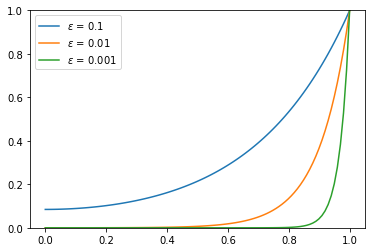

In [10]:
x = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

for eps in [0.1, 0.01, 0.001]:
    y = np.cosh(x/np.sqrt(eps))/np.cosh(1/np.sqrt(eps))
    ax.plot(x, y, label=r'$\epsilon$ = {}'.format(eps))
    
ax.set_ylim([0,1])
ax.legend()

The region where the solution changes sharply is referred to as the *boundary layer*

The approximation given by regular perturbation theory (y=0) gives an accurate solution only for the region far away from x=1, but it ignores values in the region close to 1. 

This suggests the need to develop two distinct solutions, each valid within a specific interval of x, and then connect them at the boundary. This is called the *method of matched asymptotic expansions* for *boundary layer-type problems*.

## Method of strained coordinates

This method is used for secular type problems using a rescaling approach. Let's look at an example of a free oscillation of a mass with no weight on a non-linear spring, whose friction with the surrounding media is negligible:

$$\frac{d^2}{dt^2} + y - \epsilon y^3 = 0, t>0 $$

with ICs

$$y(0) = a, \frac{dy}{dt}_{t=0} = 0 $$

Using the typical expansion:

$$y(t) = \sum_{n=0}^{\infty}{\epsilon^n y_n(t)} $$

and substituting it gives the zeroth order solution:

$$\frac{d^2 y_0}{dx^2} + y_0 = 0, y_0=a, \frac{dy_0}{dt}=0, t=0 $$

This gives:

$$y_0 = a \cos{t} $$

Finding the solution for the 1st order term and summing gives:

$$y = a \cos{t} + \epsilon \frac{a^3}{12}[\cos{t} - \cos{3t}  + 12t \sin{t}] + O(\epsilon^2) $$

This expression is not uniformly valid, due to the secular term $t \sin{t}$.

This motivates the method of strained coordinates:

In this method, we expand both the dependent and independent variables:

$$t = \tau + \epsilon f_1(\tau) + \epsilon^3 f_2(\tau) $$
$$y(t) = y_0(\tau) + \epsilon y_1(\tau) + \epsilon^2 y_2(\tau) $$

The functions $f_n(\tau)$ are determined to remove the secular terms. Before substituting, we need to determine the derivatives in the new space:

$$\frac{dy}{dt} = \frac{dy}{d \tau} \frac{d \tau}{dt}$$

Through some nasty work, we get:

$$\frac{dy}{dt} = \bigg( \frac{d y_0}{d \tau} + \epsilon \frac{d y_1}{d \tau} + ... \bigg) \bigg( 1 - \epsilon \frac{d f_1}{d \tau} + ... \bigg) $$

The second derivative is even nastier...

$$\frac{d^2y}{dt^2} = \frac{d^2 y_0}{d \tau^2} + \epsilon (\frac{d^2 y_1}{d \tau^2} - 2 \frac{d f_1}{ d \tau} \frac{d^2 y_0}{d \tau^2} - \frac{d^2 f_1}{d \tau^2} \frac{d y_0}{d \tau}) + ... $$

Substituting in gives:

$$ \frac{d^2 y_0}{d \tau^2} + \epsilon (\frac{d^2 y_1}{d \tau^2} - 2 \frac{d f_1}{ d \tau} \frac{d^2 y_0}{d \tau^2} - \frac{d^2 f_1}{d \tau^2} \frac{d y_0}{d \tau}) + ... + (y_0 + \epsilon y_1 + ...) - \epsilon (y_0^3+ 3 \epsilon y_0^2 y_1+ ...) = 0$$

To perform the variable change for the ICs, we need to establish a correspondence between our two variable spaces. We will apply the following constraint:

$$f_n(\tau)= 0 at \tau=0, n=1,2,... $$

The ICs reduce to:

$$y_0 + \epsilon y_1 + ... =a, \tau=0 $$
$$\frac{d y_0}{dt} + \epsilon \bigg( \frac{d y_1}{d \tau}- \frac{d f_1}{d \tau} \frac{d y_0}{d \tau} \bigg) + ... = 0, \tau=0$$

Equating terms gives:

$$O(\epsilon^0): \frac{d^2 y_0}{d \tau^2} + y_0 = 0, y_0(0) = a, \frac{d y_0}{d \tau}_{tau=0}=0$$

which has the solution $y_0 = a cos{\tau}$

$$O(\epsilon^1): \frac{d^2 y_1}{d \tau^2} + y_1 = 2 \frac{d f_1}{d \tau} \frac{d^2 y_0}{d \tau^2} + \frac{d^2 f_1}{d \tau^2} \frac{d y_0}{d \tau} + y_0^3$$

Substituting $y_0$ gives:

$$\frac{d^2 y_1}{d \tau^2} + y_1 = \frac{a^3}{4} \cos{3 \tau} - a \bigg( \frac{d^2 f_1}{d \tau^2} \sin{\tau} + 2\frac{d f_1}{d \tau} \cos{\tau} - \frac{3 a^2}{4}\cos{\tau} \bigg) $$

with ICs

$$y_1=0, \frac{d y_1}{d \tau} + a \frac{d f_1}{d \tau} \sin{\tau} =0, \tau=0 $$

Solving this looks like it will definitely introduce secular terms. But we have control over the function f. We can use this to cancel the inhomogeneous terms, which give rise to the secular terms:

$$ \frac{d^2 f_1}{d \tau^2} \sin{\tau} + 2\frac{d f_1}{d \tau} \cos{\tau} = \frac{3 a^2}{4}\cos{\tau}$$

This can be rewritten as:

$$\frac{d}{d \tau} \bigg[ \sin^2{\tau} \frac{d f_1}{d \tau} \bigg] = \frac{3 a^2}{4}\sin{\tau}\cos{\tau} $$

Solving gives:

$$f_1 = \frac{3 a^2}{8} \tau $$

This reduces our problem to:

$$\frac{d2 y_1}{d \tau^2} + y_1 = \frac{a^2}{4} \cos{3 \tau} $$

Solving gives:

$$y(t) = a \cos{\tau} + \epsilon \frac{a^3}{32} (\cos{\tau} - \cos{3 \tau}) + O(\epsilon^2) $$

$$t = \tau + \epsilon\frac{3a^2}{8} \tau + ... $$

And

$$\tau = \frac{t}{1 + \epsilon(3a^2/8)+ ...} = \bigg( 1 - \epsilon \frac{3a^2}{8} \bigg) = \omega(\epsilon, a)t $$

Other methods exist for solving secular-type problems, but they can get more complex.

(-3.6, 3.6)

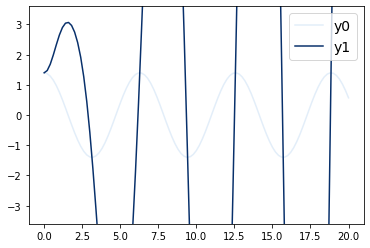

In [58]:
eps = 1.9
a = 1.4

t = np.linspace(0, 20, 101)

y0 = a*np.cos(t)
y1 = y0 + eps*a**3*(np.cos(t) - np.cos(3*t) + 12*t*np.sin(t))/32

colors = cm.Blues(np.linspace(0.1, 1, 2))

fig, ax = plt.subplots()

ax.plot(t, y0, c=colors[0], label='y0')
ax.plot(t, y1, c=colors[1], label='y1')

ax.legend(fontsize=14)
ax.set_ylim([-3.6, 3.6])

(-1.6, 1.6)

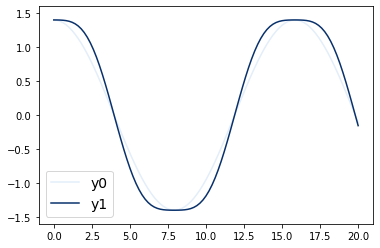

In [55]:
eps = 1.9
a = 1.4

t = np.linspace(0, 20, 101)
tau = (1 - eps*3*a**2/8)*t

y0 = a*np.cos(tau)
y1 = y0 + eps*a**3*(np.cos(tau) - np.cos(3*tau))/32

colors = cm.Blues(np.linspace(0.1, 1, 2))

fig, ax = plt.subplots()

ax.plot(t, y0, c=colors[0], label='y0')
ax.plot(t, y1, c=colors[1], label='y1')

ax.legend(fontsize=14)
ax.set_ylim([-1.6, 1.6])
#ax.set_xlim([0.0, 5.01])

## Boundary layer theory

Previously, we saw that boundary value problems can't be expressed using a single asymptotic expression, but rather require the combination of two asymptotic solutions: the *outer expansion* representing the smoothly changing portion of the solution, and the *inner expansion* representing the rapidly changing portion in the boundary layer.

Since the width of this layer goes to zero as $\epsilon \rightarrow 0$, we need to magnify it to make the variation of y smooth. We will do this by introducing a stretching variable:

$$s = \frac{1 -x}{\epsilon^\lambda} $$

For a first example, we will continue using the diffusion-reaction system:

**Outer expansion**

$$y^o(x, \epsilon) = \sum_{n=0}^{\infty}{\epsilon^n y_n^o(x)}$$

Substituting gives:

$$O(\epsilon^0): y_0^o = 0, \frac{d y_0^o}{dx} = 0, x=0 $$
$$O(\epsilon^1): \frac{d^2 y_0^o}{dx^2} -  y_1^o = 0, \frac{d y_1^o}{dx} = 0, x=0 $$
$$O(\epsilon^2): \frac{d^2 y_1^o}{dx^2} -  y_2^o = 0, \frac{d y_2^o}{dx} = 0, x=0 $$

This leads to the solution

$$y^o = 0 $$

**Inner expansion**

By applying the stretching transformation $s = (1-x)/\sqrt{\epsilon}$, we get:

$$\frac{d^2 y}{ds^2} = y, y(0)=1 $$

The stretching transformation makes the second-order derivative the same magnitude as y. We do not apply the second BC, as we are only interested in the region within the boundary layer. The inner expansion is obtained from the asymptotic series:

$$y^i(s, \epsilon) = \sum_{n=0}^{\infty}\epsilon^n y_n^i(s) $$

This gives the sub-problems:

$$O(\epsilon^0): \frac{d^2 y_0^i}{ds^2} - y_0^i = 0, y_0^i=1, s=0 $$
$$O(\epsilon^1): \frac{d^2 y_1^i}{ds^2} - y_1^i = 0, y_1^i=0, s=0 $$

Solving the zeroth order term gives:

$$y_0^i = (1-C)e^s + Ce^{-s} $$

Enter the matching part of this method. There exists a region where the outer and inner solutions overlap e.g. both are valid. For the zeroth-order term, this is obtained from:

$$\lim_{x \rightarrow 1} y_0^o = \lim_{s \rightarrow \infty} y_0^i$$

This leads to the conclusioni that $C=1$. Thus:

$$y_0^i = e^{-s}$$

The composite solution can be expressed as a sum of the two components:

$$y_0^c(x) = y_0^o(x) + y_0^i(x) - (common party) $$

In this case, the common part is zero, and

$$y_0^c(x) = e^{-\frac{1-x}{\sqrt{\epsilon}}} $$

In the above example, the location of the boundary layer was found by looking at the exact solution-- which we won't know when solving these problems for real. Additionally, the matching condition only applies to the zero-order term. So, let's try another problem and see if we can solve it.

$$\epsilon \frac{d^2 y}{dx^2} + \nu \frac{dy}{dx} = e^x, x \in (0,1)$$
$$y(0)=\alpha, y(1)=1 $$

where $\nu = \pm 1$. The analytical solution is:

$$y = c_1 + c_2 e^{- \nu x/\epsilon} + \frac{e^x}{\nu + \epsilon} $$

where

$$c_1 = \frac{[\alpha(\nu + \epsilon) -1]e^{-\nu/\epsilon} + e - (\nu + \epsilon)}{(\nu + \epsilon)(e^{-\nu/\epsilon}-1)} $$

$$c_2 = \frac{(1 - \alpha)(\nu + \epsilon) + 1 - e}{(\nu + \epsilon)(e^{-\nu/\epsilon}-1)} $$

When $\nu=+1$, the boundary is close to x=0, and when $\nu=-1$, the boundary is close to x=1:

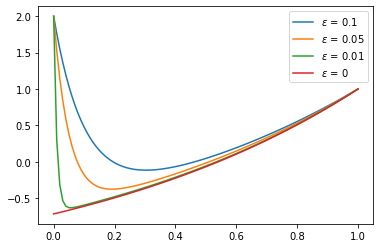

In [40]:
v = 1
a = 2
x = np.linspace(0, 1, 101)

fig, ax = plt.subplots()
for eps in [0.1, 0.05, 0.01]:
    c1 = ((a*(v+eps)-1)*np.exp(-v/eps) + np.exp(1) - (v+eps))/((v+eps)*(np.exp(-v/eps)-1))
    c2 = ((1-a)*(v+eps)+1-np.exp(1))/((v+eps)*(np.exp(-v/eps)-1))
    y = c1+ c2*np.exp(-v*x/eps) + np.exp(x)/(v+eps)
    ax.plot(x, y, label=r'$\epsilon$ = {}'.format(eps))

ax.plot(x, 1 - np.exp(1)+ np.exp(x), label=r'$\epsilon$ = 0')
ax.legend()

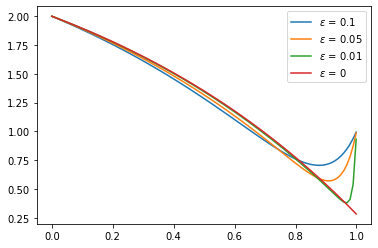

In [38]:
v = -1
a = 2
x = np.linspace(0.0001, 0.999, 101)

fig, ax = plt.subplots()
for eps in [0.1, 0.05, 0.01]:
    c1 = ((a*(v+eps) -1)*np.exp(-v/eps) + np.exp(1) - (v+eps))/((v+eps)*(np.exp(-v/eps)-1))
    c2 = ((1-a)*(v+eps)+1-np.exp(1))/((v+eps)*(np.exp(-v/eps)-1))
    y = c1+ c2*np.exp(-v*x/eps) + np.exp(x)/(v+eps)
    ax.plot(x, y, label=r'$\epsilon$ = {}'.format(eps))

ax.plot(x, 1 + a - np.exp(x), label=r'$\epsilon$ = 0')
ax.legend()

We have also plotted the solutions obtained when $\epsilon=0$ (aka the zeroth-order terms of the outer expansions). These give good approximations for most of the domain, but break down in the boundary layer region. It appears that the boundary condition contained by the boundary layer actually doesn't affect most of the solution. This is a characteristic of boundary layer problems.

The location of the boundary layer isn't always obvious, and may require some analysis. Some useful hints can be given in the case of physical problems. When no hints are given, there is a useful procedure for determining it. This method will give us the location of the boundary layer as well as the form of the stretching transformation.

1. **Assume the boundary layer is at x=0.** Determine the zeroth-order term of the outer expansion:

$$\nu \frac{d y_0^o}{dx} = e^x, y_0^o(1)=1 $$

which gives:

$$y_0^o = 1 + \frac{1}{\nu}(e^x - e) $$

For the inner expansion:

$$s = \frac{x}{\epsilon^\lambda}$$. Within the overlapping region (near 0), the two limits hold simultaneously. Substituting gives:

$$\frac{d^2 y}{ds^2} + v\epsilon^{\lambda-1}\frac{dy}{ds} = \epsilon^{2 \lambda -1} e^{s \epsilon^\lambda} $$

And substituting the power series expansion into this expression gives:

$$\bigg[ \frac{d^2 y_0^i}{ds^2} + \epsilon \frac{d^2 y_1^i}{ds^2} + ... \bigg] + \nu \epsilon^{\lambda-1}\bigg[ \frac{d y_0^i}{ds} + \epsilon \frac{dy_1^i}{ds} + ...  \bigg] = \epsilon^{2 \lambda -1}[1 - s \epsilon^{\lambda}+ ...], y_0^i + \epsilon y_1^i + ... \alpha, s=0$$

The equation for the zeroth order term of the inner expansion will de different depending on the value of $\lambda$:

**Case 1: $\lambda > 0$**

The zero-order term becomes:

$$\frac{d^2y_0^i}{ds^2} = 0, y_0^i(0) = \alpha $$

Integrating gives:

$$y_0^i = \alpha + Cs $$

where C is found by matching terms with the zeroth order term of the outer expansion. This becomes:

$$\lim_{s \rightarrow \infty}{\alpha + Cs} = \lim_{x \rightarrow 0}{1 + \frac{1}{\nu}(e^x - e)}$$

which only allow C=0. This gives $\alpha = [1 + (1\nu)(1-e)]$. But this doesn't admit a general solution, and the stretching transformation cannot work in this case.

**Case 2: $\lambda = 1$**

The zero-order term becomes:

$$\frac{d^2y_0^i}{ds^2} + \nu \frac{dy_0^i}{ds} = 0, y_0^i(0) = \alpha $$

The solution is:

$$y_0^i = \alpha - C(1 - e^{-\nu s})$$

By applying the matching condition,

$$\lim_{s \rightarrow \infty}{\alpha - C(1 - e^{-\nu s})} = \lim_{s \rightarrow 0}{1 + \frac{1}{\nu}(e^x - e)}$$

For $\nu=+1$, this admits $C=\alpha - 2 + e$. For $\nu=-1$, the only admissible solution is C=0, and a solution only exists then for the special case $\alpha=e$. Since the solution is fully satisfactory for the $\nu=+1$ case, the BC is indeed close to 0. 

**Case 3: $0 < \lambda < 1$**

In this case... ??? 

Either way, it doesn't work.

2. **Assume the boundary layer is at x=1.** Determine the zeroth-order term of the outer expansion:

In this case, the outer expansion has to account for the condition at the opposite boundary:

$$\nu \frac{d y_0^o}{dx} = e^x, y_0^o(0) = \alpha $$

and the solution is:

$$y_0^o = \alpha - \frac{1}{\nu}(1 - e^{x}) $$

We use the stretching transformation:

$$s = \frac{1 - x}{\epsilon^\lambda} $$

In this case, the overlapping region is near x=1. For the inner expansion, we get the expression:

$$\bigg[ \frac{d^2 y_0^i}{ds^2} + \epsilon \frac{d^2 y_1^i}{ds^2} + ... \bigg] - \nu \epsilon^{\lambda-1}\bigg[ \frac{d y_0^i}{ds} + \epsilon \frac{dy_1^i}{ds} + ...  \bigg] = e \epsilon^{2 \lambda -1}[1 - s \epsilon^{\lambda}+ ...], y_0^i + \epsilon y_1^i + ... = 1, s=0$$

**Case 1: $\lambda > 0$**

The zero-order terms becomes:

$$\frac{d^2 y_0^i}{ds^2} = 0, y_0^i(0)= 1 $$

whose solution is $y_0^i = 1 + Cs$

Like the case above, this doesn't have a solution using this method.

**Case 2: $\lambda$=1**

In this case, 

$$\frac{d^2y_0^i}{ds^2} - \nu \frac{dy_0^i}{ds} = 0, y_0^i(0) = 1 $$

Thus,

$$y_0^i = 1 - C(1 - e^{\nu s}) $$

Matching terms gives $C = e - \alpha$ when $\nu = -1$. But when $\nu=+1$, the only possible solution is C=0, only valid in the special case $\alpha=2- e$. 

**Case 3: $0< \lambda < 1$**

Similarly to the problem above, no solution.

Summarizing, the problem admits a boundary layer located at x=0 if $\nu=+1$ and at x=1 if $\nu=-1$. The stretching transformations are $s=x/\epsilon$ for the first case and $s=(1-x)/\epsilon$ in the second case.


## Matching principle

We showed how to match terms in the inner and outer solutions for a zero-order solution, but this is not generally applicable for higher order solutions. We need to show how to generalize this.

To demonstrate, we will continue using our diffusion-reaction problem in the case when $\nu=+1$. The outer solution expansion is expressed as:

$$y^o = \sum_{n=0}^{\infty}{\epsilon^n y_n^o(x)} $$

Substituting and comparing terms of like powers of $\epsilon$:

$$O(\epsilon^0): \frac{dy_0^o}{dx} = e^x, y_0^o(1)=1 $$
$$O(\epsilon^1): \frac{d^2 y_0^o}{dx^2} + \frac{dy_1^o}{dx} = 0, y_1^o(1)=0 $$

The solution becomes:

$$y^o = (e^x + 1 - e) + \epsilon (e - e^x) + O(\epsilon^2) $$

Doing the same thing for the inner solution and our stretching transformation $s=x/\epsilon$:

$$O(\epsilon^0): \frac{d^2y_0^i}{ds^2} + \frac{dy_0^i}{d} = 0, y_0^i(0)=\alpha $$
$$O(\epsilon^1): \frac{d^2 y_0^i}{ds^2} + \frac{dy_1^i}{ds} = 1, y_1^o(0)=0 $$

Which leads to the solution:

$$y^i = [\alpha - C_1(1 - e^{-s})] + \epsilon[C_2(1 - e^{-s}) + s]+ O(\epsilon^2) $$

where C_1 and C_2 are integration constants to be found using the matching principle:

The m-term outer expansion of the k-term inner solution equals the k-term inner expansion of the m-term outer expansion. The m-term outer expansion of an inner solution is given by:

$$\lim_{\epsilon \rightarrow 0}{u^i \bigg( \frac{x}{\epsilon} \bigg)} $$

And the k-term inner expansion of an outer solution is given by:

$$\lim_{\epsilon \rightarrow 0}{u_o(s \epsilon)}$$

**Case 1: k=m=1 **

The first-term outer solution is $y^o = e^x + 1 - e$, and its first-term inner expansion is:

$$e^{\epsilon s} + 1 - e = 2 - e $$

The first-term solution is $y_i = \alpha - C_1(1 - e^{-s})$, and its first-term outer expansion is:

$$\alpha - C_1(1 - e^{-s/\epsilon}) = \alpha - C_1 $$

Equating these two using the matching principle:

$$C_1 = \alpha - 2 + e $$

**Case 2: k=m=2 **

Two-term outer solution and its two-term inner expansion is:

$$e^{\epsilon s} + 1 - e + \epsilon(e - e^{\epsilon s}) = (2 - e)+ \epsilon(s + e - 1) $$

And the two-term inner solution and its two-term outer expansion is:

$$[\alpha - C_1(1 - e^{-x/\epsilon})] + \epsilon \bigg[ C_2(1 - e^{-x/\epsilon}) + \frac{x}{\epsilon} \bigg]  = (\alpha - C_1 + x) + \epsilon C_2$$

It follows that:

$$C_1 = \alpha - 2 + e $$
$$C_2 = e - 1 $$

